# Behavior Analysis: Total Instances of Behavior

Press SHIFT + ENTER to run code

### USER INPUT!

In [14]:
## Define project
project_name = ''

# Select group and condition, see meta.py to see how you previously defined it for your project
selected_groups = ['', '']
selected_conditions = ['', '']

### Main Code: Create Bar Graph of Total Instances for Behavior

1 1


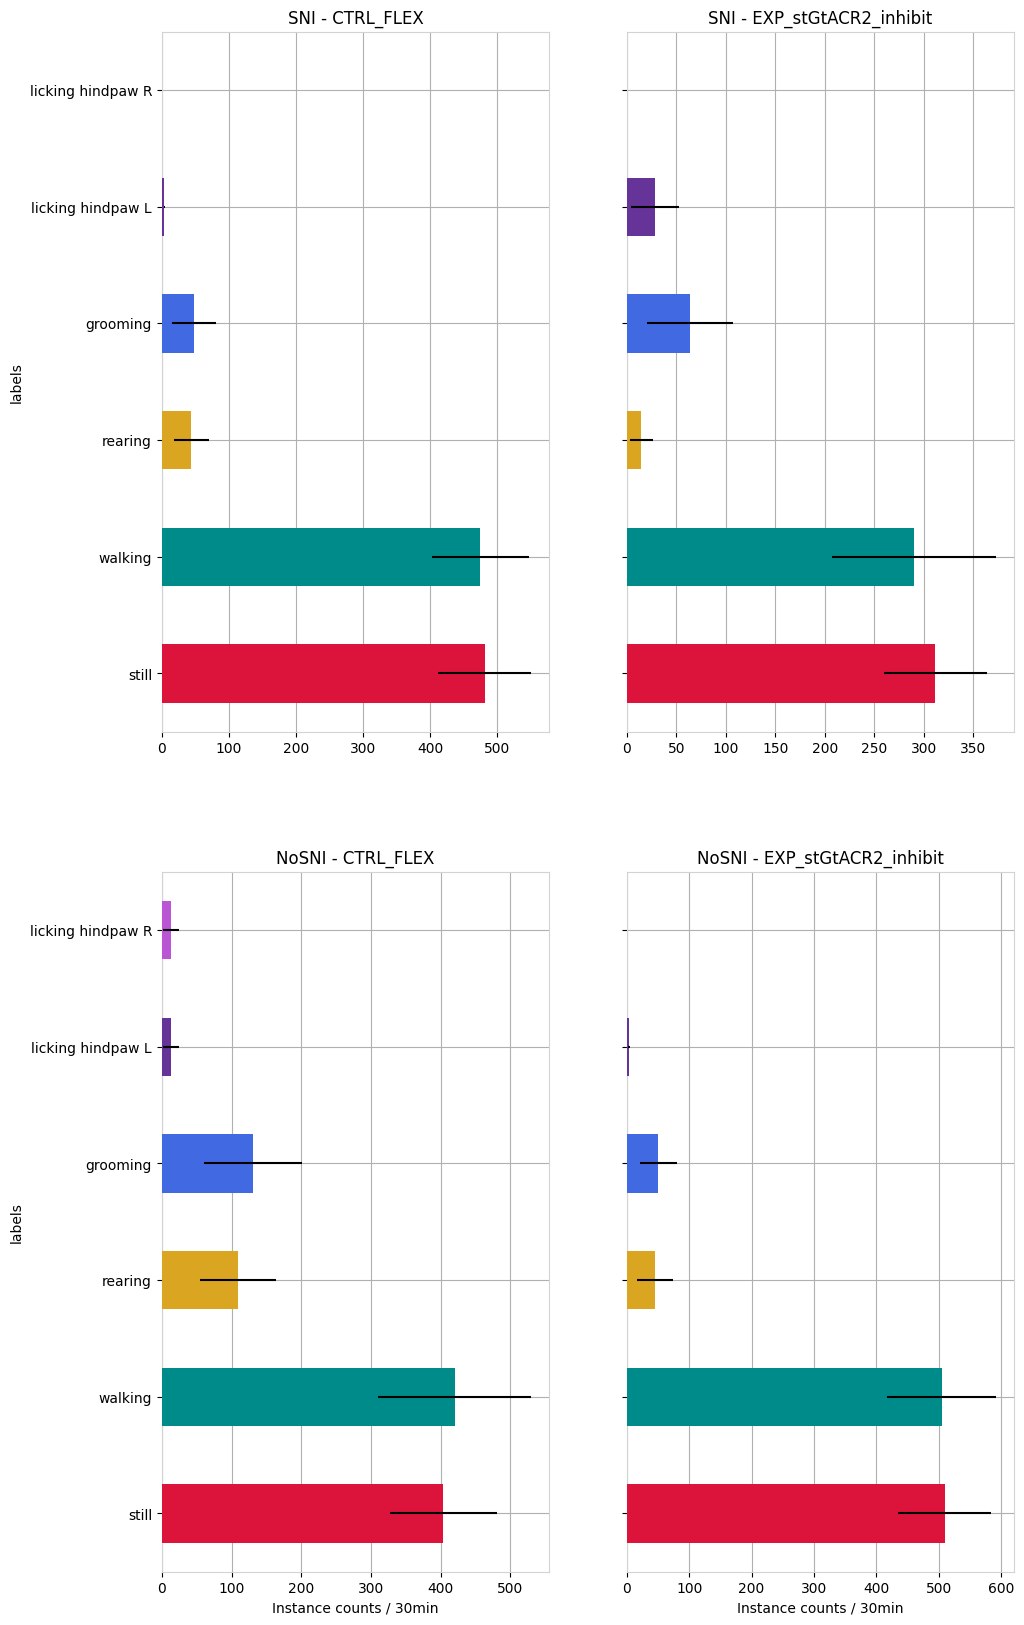

In [34]:
###### RUN DEPENDENCIES ######
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys

if not os.path.join(os.path.abspath(''), '../') in sys.path:
    sys.path.append(os.path.join(os.path.abspath(''), '../'))
    
from utils.classification import load_behaviors
from utils.meta import *
import warnings

###### Load Behaviors ######
behaviors = load_behaviors(f"../processed_dataset/{project_name}/behaviors_{project_name}.pkl")

# Define the directory path
directory_path = f"../processed_dataset/{project_name}/figures/behavior_instance-counts"
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

def get_num_bouts(predict, behavior_classes):
    bout_counts = []
    bout_start_idx = np.where(np.diff(np.hstack([-1, predict])) != 0)[0]
    bout_start_label = predict[bout_start_idx]
    for b, behavior_name in enumerate(behavior_classes):
        idx_b = np.where(bout_start_label == int(b))[0]
        if len(idx_b) > 0:
            bout_counts.append(len(idx_b))
        else:
            bout_counts.append(np.NAN)
    return bout_counts

rows = len(selected_groups)
cols = len(selected_conditions)
count = 0
fig, ax = plt.subplots(rows, cols, figsize=(11, 20), sharex=False, sharey=True)
for row in range(rows):
    if row > 4:
        cols = 1
        fig.delaxes(ax[row, 1])
        fig.delaxes(ax[row, 2])
    else:
        cols = len(selected_conditions)
        
    for col in range(cols):
        
        selected_group = selected_groups[row]
        selected_condition = selected_conditions[col]
        
        bout_counts = []
        for f in range(len(behaviors[selected_group][selected_condition])):
            bout_counts.append(get_num_bouts(behaviors[selected_group][selected_condition][f'file{f}'], behavior_names))
        
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            bout_mean = np.nanmean(bout_counts, axis=0)
            bout_std = np.nanstd(bout_counts, axis=0)
            
        behavior_instance_dict = {'mean_counts': bout_mean,
                                  'std_counts': bout_std,
                                  'labels': behavior_names,
                                  'colors': behavior_colors,
                                  }
        behavior_instance_df = pd.DataFrame(behavior_instance_dict)
        
        # Save the DataFrame
        csv_filename = f"../processed_dataset/{project_name}/figures/behavior_instance-counts/behavior_instance_counts_{project_name}_{selected_group}-{selected_condition}.csv"
        behavior_instance_df.to_csv(csv_filename)

        # Bar chart with errorbars
        behavior_instance_df.plot.barh(y='mean_counts', 
                                       x='labels', 
                                       xerr='std_counts', 
                                       color=behavior_colors, 
                                       legend=False, 
                                       ax=ax[row, col], 
                                       zorder=3)
        
        # Add titles to the plots
        ax[row, col].set_title(f'{selected_group} - {selected_condition}')
        
        # Add grid lines behind the bars
        ax[row, col].grid(True, zorder=0)
        
        # Set axis spines to a softer grey color
        ax[row, col].spines['top'].set_color('#D3D3D3')
        ax[row, col].spines['right'].set_color('#D3D3D3')
        ax[row, col].spines['bottom'].set_color('#D3D3D3')
        ax[row, col].spines['left'].set_color('#D3D3D3')
        
        if col == 1 or col == 2:
            if row == rows-1:
                print(row, col)
                ax[row, col].set_xlabel('Instance counts / 30min')
        
                
        if row == rows-1:
            ax[row, col].set_xlabel('Instance counts / 30min')
    
    fig.savefig(f"../processed_dataset/{project_name}/figures/behavior_instance-counts/behavior_counts_{project_name}.svg", 
            dpi=600, bbox_inches='tight')
            
plt.show()

# ANALYSIS COMPLETE!